
# • Build Kmeans and Agglomerative clustering models

# • Apply PCA and reduce the features to 25 to 30 and then repeat the clustering

# • Compare the first and second models

In [123]:
from google.colab import files
uploaded = files.upload()

Saving NCI60_X.csv to NCI60_X (3).csv


In [124]:
 # import necessary libraries and read data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data=pd.read_csv('NCI60_X.csv', index_col = 0)
data.head(5)

,1,2,3,4,5,6,7,8,9,10,...,6821,6822,6823,6824,6825,6826,6827,6828,6829,6830
V1,0.300000,1.180000,0.550000,1.140000,-0.265000,-7.000000e-02,0.350000,-0.315000,-0.450000,-0.654980,...,-0.990020,0.000000,0.030000,-0.175000,0.629981,-0.030000,0.000000,0.280000,-0.340000,-1.930000
V2,0.679961,1.289961,0.169961,0.379961,0.464961,5.799610e-01,0.699961,0.724961,-0.040039,-0.285019,...,-0.270058,-0.300039,-0.250039,-0.535039,0.109941,-0.860039,-1.250049,-0.770039,-0.390039,-2.000039
V3,0.940000,-0.040000,-0.170000,-0.040000,-0.605000,0.000000e+00,0.090000,0.645000,0.430000,0.475019,...,0.319981,0.120000,-0.740000,-0.595000,-0.270020,-0.150000,0.000000,-0.120000,-0.410000,0.000000
V4,0.280000,-0.310000,0.680000,-0.810000,0.625000,-1.387779e-17,0.170000,0.245000,0.020000,0.095019,...,-1.240020,-0.110000,-0.160000,0.095000,-0.350019,-0.300000,-1.150010,1.090000,-0.260000,-1.100000
V5,0.485000,-0.465000,0.395000,0.905000,0.200000,-5.000000e-03,0.085000,0.110000,0.235000,1.490019,...,0.554980,-0.775000,-0.515000,-0.320000,0.634980,0.605000,0.000000,0.745000,0.425000,0.145000


In [125]:
data.tail(5)

,1,2,3,4,5,6,7,8,9,10,...,6821,6822,6823,6824,6825,6826,6827,6828,6829,6830
V60,-0.03,-0.48,0.07,-0.70,-0.195,4.100000e-01,-0.24,0.105,-0.41,0.875019,...,-0.400019,0.15,-0.43,0.145,-0.090020,-0.02,-1.39001,-1.15,0.29,1.19
V61,-0.27,0.63,-0.10,1.10,1.045,8.000000e-02,-0.09,-0.675,-0.31,0.275019,...,-0.560020,0.20,0.29,-0.035,0.279981,-0.16,-0.02001,-0.64,-0.37,-0.43
V62,0.21,-0.62,-0.15,-1.33,0.045,-4.000000e-01,-0.39,-0.675,-0.36,0.945020,...,-0.160020,-0.12,0.85,-0.125,0.779980,0.39,0.00000,0.16,2.03,3.94
V63,-0.05,0.14,-0.09,-1.26,0.045,-2.710505e-20,0.42,-0.305,0.31,0.065019,...,0.889980,-0.42,-0.46,-0.855,-0.160020,-0.35,-0.36001,-0.49,0.01,-1.72
V64,0.35,-0.27,0.02,-1.23,-0.715,-3.400000e-01,-0.52,0.475,0.23,0.915019,...,1.629980,3.00,2.86,2.145,0.869981,0.48,0.96999,0.29,-0.15,1.21


In [126]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64 entries, V1 to V64
Columns: 6830 entries, 1 to 6830
dtypes: float64(6830)
memory usage: 3.3+ MB


In [127]:
data.describe()

,1,2,3,4,5,6,7,8,9,10,...,6821,6822,6823,6824,6825,6826,6827,6828,6829,6830
count,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,...,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000
mean,-0.019063,-0.027813,-0.019923,-0.328673,0.026093,0.006718,0.019687,-0.023126,0.000780,0.019237,...,-0.079551,0.402577,0.295077,0.171093,0.101152,0.153671,0.090775,-0.126798,0.129921,0.143514
std,0.441332,0.757433,0.433306,1.091905,0.485073,0.350432,0.370683,0.338629,0.429188,0.641583,...,0.890365,1.131769,1.121419,0.888764,0.641122,0.924292,1.209138,0.787136,0.566303,1.509312
min,-1.060000,-2.190000,-1.710000,-2.610000,-0.825000,-0.700000,-0.920000,-0.705000,-0.900000,-1.654981,...,-1.850020,-0.775000,-1.150000,-2.095000,-1.390020,-1.330000,-2.030010,-1.700000,-0.910000,-2.830000
25%,-0.372500,-0.404985,-0.192485,-1.322500,-0.225000,-0.156250,-0.246250,-0.204985,-0.360000,-0.477466,...,-0.660019,-0.177500,-0.327500,-0.328750,-0.232519,-0.330000,-0.602510,-0.682500,-0.275000,-1.100000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.310005,0.352500,0.162490,0.692500,0.210000,0.184995,0.247505,0.160015,0.295000,0.467519,...,0.304980,0.560000,0.422500,0.427500,0.302480,0.325000,0.134995,0.302505,0.451255,1.250000
max,0.940000,2.240000,1.150000,1.500000,1.715000,1.160000,0.940000,0.724961,0.990000,1.490019,...,2.929980,5.200000,5.510000,3.995000,2.899980,4.600000,5.339990,2.560000,2.030000,3.940000


In [128]:
data.dtypes

1       float64
2       float64
3       float64
4       float64
5       float64
         ...   
6826    float64
6827    float64
6828    float64
6829    float64
6830    float64
Length: 6830, dtype: object

In [129]:
data.shape

(64, 6830)

In [130]:
data.isnull().sum()

1       0
2       0
3       0
4       0
5       0
       ..
6826    0
6827    0
6828    0
6829    0
6830    0
Length: 6830, dtype: int64

The dataset shows the properties of 64 datapoints related to NCI (National Cancer Institute) Cancer cell line data. The same needs to be clustered under various groups.

As we have 6830 rows, it is not possible to show the correlation of the columns.

## **Data Preprocessing**

In [131]:
data.describe()

,1,2,3,4,5,6,7,8,9,10,...,6821,6822,6823,6824,6825,6826,6827,6828,6829,6830
count,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,...,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000
mean,-0.019063,-0.027813,-0.019923,-0.328673,0.026093,0.006718,0.019687,-0.023126,0.000780,0.019237,...,-0.079551,0.402577,0.295077,0.171093,0.101152,0.153671,0.090775,-0.126798,0.129921,0.143514
std,0.441332,0.757433,0.433306,1.091905,0.485073,0.350432,0.370683,0.338629,0.429188,0.641583,...,0.890365,1.131769,1.121419,0.888764,0.641122,0.924292,1.209138,0.787136,0.566303,1.509312
min,-1.060000,-2.190000,-1.710000,-2.610000,-0.825000,-0.700000,-0.920000,-0.705000,-0.900000,-1.654981,...,-1.850020,-0.775000,-1.150000,-2.095000,-1.390020,-1.330000,-2.030010,-1.700000,-0.910000,-2.830000
25%,-0.372500,-0.404985,-0.192485,-1.322500,-0.225000,-0.156250,-0.246250,-0.204985,-0.360000,-0.477466,...,-0.660019,-0.177500,-0.327500,-0.328750,-0.232519,-0.330000,-0.602510,-0.682500,-0.275000,-1.100000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.310005,0.352500,0.162490,0.692500,0.210000,0.184995,0.247505,0.160015,0.295000,0.467519,...,0.304980,0.560000,0.422500,0.427500,0.302480,0.325000,0.134995,0.302505,0.451255,1.250000
max,0.940000,2.240000,1.150000,1.500000,1.715000,1.160000,0.940000,0.724961,0.990000,1.490019,...,2.929980,5.200000,5.510000,3.995000,2.899980,4.600000,5.339990,2.560000,2.030000,3.940000


As seen above, the data is not scaled, as we have various values for SD and mean. Also, the min-max value doesnot stand between 0 and 1. We can go for Standard scaling method

In [132]:
# scaling the data
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
sdata = scalar.fit_transform(data)
sdata = pd.DataFrame(sdata,columns=data.columns)
sdata.describe()

,1,2,3,4,5,6,7,8,9,10,...,6821,6822,6823,6824,6825,6826,6827,6828,6829,6830
count,6.400000e+01,6.400000e+01,64.000000,6.400000e+01,6.400000e+01,64.000000,6.400000e+01,6.400000e+01,6.400000e+01,6.400000e+01,...,6.400000e+01,6.400000e+01,6.400000e+01,6.400000e+01,6.400000e+01,6.400000e+01,64.000000,6.400000e+01,6.400000e+01,6.400000e+01
mean,2.775558e-17,-1.387779e-17,0.000000,3.122502e-17,-1.040834e-17,0.000000,2.775558e-17,2.775558e-17,1.734723e-17,-2.775558e-17,...,-2.428613e-17,2.775558e-17,-1.387779e-17,5.204170e-17,6.938894e-18,5.551115e-17,0.000000,2.775558e-17,-6.938894e-18,6.938894e-18
std,1.007905e+00,1.007905e+00,1.007905,1.007905e+00,1.007905e+00,1.007905,1.007905e+00,1.007905e+00,1.007905e+00,1.007905e+00,...,1.007905e+00,1.007905e+00,1.007905e+00,1.007905e+00,1.007905e+00,1.007905e+00,1.007905,1.007905e+00,1.007905e+00,1.007905e+00
min,-2.377270e+00,-2.877193e+00,-3.931262,-2.105826e+00,-1.768435e+00,-2.032645,-2.555051e+00,-2.029547e+00,-2.115392e+00,-2.630141e+00,...,-2.004194e+00,-1.048700e+00,-1.298802e+00,-2.569869e+00,-2.344267e+00,-1.617887e+00,-1.767830,-2.014441e+00,-1.850851e+00,-1.985687e+00
25%,-8.071713e-01,-5.018980e-01,-0.401395,-9.173725e-01,-5.217310e-01,-0.468724,-7.230938e-01,-5.412910e-01,-8.472563e-01,-7.803041e-01,...,-6.570984e-01,-5.165919e-01,-5.595580e-01,-5.668481e-01,-5.245635e-01,-5.274250e-01,-0.577904,-7.115609e-01,-7.206783e-01,-8.304080e-01
50%,4.353664e-02,3.701052e-02,0.046342,3.033881e-01,-5.421676e-02,-0.019322,-5.352873e-02,6.883255e-02,-1.832542e-03,-3.022115e-02,...,9.005226e-02,-3.585180e-01,-2.652086e-01,-1.940283e-01,-1.590203e-01,-1.675724e-01,-0.075668,1.623610e-01,-2.312333e-01,-9.583766e-02
75%,7.515195e-01,5.060775e-01,0.424308,9.426144e-01,3.821298e-01,0.512757,6.194484e-01,5.451041e-01,6.909453e-01,7.042364e-01,...,4.352942e-01,1.401940e-01,1.145247e-01,2.907792e-01,3.165084e-01,1.868279e-01,0.036861,5.497099e-01,5.719101e-01,7.389014e-01
max,2.190290e+00,3.017748e+00,2.721339,1.687994e+00,3.509280e+00,3.317043,2.502375e+00,2.226625e+00,2.323083e+00,2.310550e+00,...,3.406828e+00,4.272379e+00,4.687052e+00,4.336512e+00,4.400030e+00,4.848555e+00,4.375607,3.440368e+00,3.381761e+00,2.535260e+00


**K-Means clustering**

In [133]:
# K-Means clustering
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
  kmeans.fit(sdata)
  wcss.append(kmeans.inertia_)
  print(kmeans.inertia_)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


437119.9999999999
399863.76930879406


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


380668.610402625


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


352334.1802230891


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


343161.5489416201


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


327299.16034466494


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


312447.7517052181


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


304556.25678928266


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


292916.0866917294


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


284849.211438132


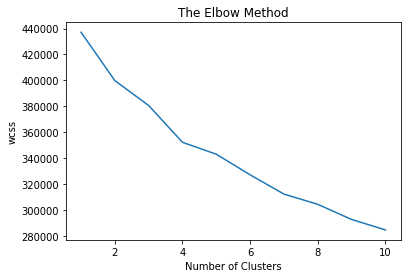

In [134]:
# Elbow method
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('wcss')
plt.show()

From the above, we are not able to identify the exact elow, but for the point 4, we are getting a better elbow. 
As the inertia is found to be decreasing from 4 to 6, we can take optimim number of clusters (n) as 5

In [135]:
# K-Means
kmeans=KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans=kmeans.fit_predict(sdata)
type(sdata)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


pandas.core.frame.DataFrame

In [136]:
y_kmeans

array([2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 4, 4, 1, 4, 2, 2, 2, 1, 1, 4, 4, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 1, 4, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int32)

In [137]:
len(y_kmeans)

64

In [138]:
unique, counts = np.unique(y_kmeans, return_counts=True)
dict(zip(unique, counts))

{0: 9, 1: 11, 2: 21, 3: 6, 4: 17}

The above values show the number of observations in each cluster. Now we can add the Cluster value against each line item in the data set.

In [139]:
sdata['cluster'] = y_kmeans

In [140]:
sdata

,1,2,3,4,5,6,7,8,9,10,...,6822,6823,6824,6825,6826,6827,6828,6829,6830,cluster
0,0.728671,1.607220,1.325688,1.355688,-0.604845,-0.220654,0.898137,-0.868741,-1.058612,-1.059174,...,-0.358518,-0.238245,-0.392487,0.831370,-0.200286,-0.075668,0.520893,-0.836365,-1.384675,2
1,1.596418,1.753544,0.441686,0.654119,0.911898,1.648748,1.849697,2.226625,-0.095860,-0.477977,...,-0.625720,-0.489938,-0.800791,0.013818,-1.105413,-1.117676,-0.823652,-0.925425,-1.431446,2
2,2.190290,-0.016217,-0.349092,0.266465,-1.311310,-0.019322,0.191185,1.988627,1.007979,0.716019,...,-0.251651,-0.930304,-0.868790,-0.583517,-0.331142,-0.075668,0.008704,-0.960951,-0.095838,1
3,0.682995,-0.375502,1.628079,-0.444299,1.244434,-0.019322,0.408709,0.798057,0.045135,0.119051,...,-0.456479,-0.409013,-0.086293,-0.709285,-0.494711,-1.034286,1.558075,-0.693981,-0.830408,1
4,1.151170,-0.581759,0.965145,1.138767,0.361351,-0.033703,0.177590,0.396239,0.550041,2.310550,...,-1.048700,-0.728079,-0.556925,0.839231,0.492157,-0.075668,1.116312,0.525182,0.000992,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,-0.024977,-0.601719,0.209168,-0.342761,-0.459396,1.159911,-0.706100,0.381357,-0.964676,1.344405,...,-0.224934,-0.651683,-0.029591,-0.300540,-0.189382,-1.234343,-1.310181,0.284909,0.698834,0
60,-0.573084,0.875343,-0.186266,1.318766,2.117127,0.210772,-0.298243,-1.940254,-0.729836,0.401825,...,-0.180407,-0.004563,-0.233720,0.281136,-0.342046,-0.092347,-0.657141,-0.889759,-0.382988,0
61,0.523130,-0.788015,-0.302571,-0.924296,0.039286,-1.169792,-1.113957,-1.940254,-0.847256,1.454373,...,-0.465385,0.498752,-0.335785,1.067185,0.257708,-0.075668,0.367236,3.381761,2.535260,0
62,-0.070652,0.223307,-0.163005,-0.859681,0.039286,-0.019322,1.088471,-0.838977,0.726171,0.071922,...,-0.732552,-0.678646,-1.163643,-0.410587,-0.549234,-0.375762,-0.465070,-0.213435,-1.244439,0


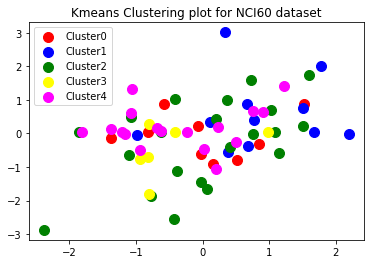

In [141]:
# scatter-plot
sdata1 = np.array(sdata)
plt.scatter(sdata1[y_kmeans == 0,0],sdata1[y_kmeans == 0,1], s=100, c='red', label = 'Cluster0')
plt.scatter(sdata1[y_kmeans == 1,0],sdata1[y_kmeans == 1,1], s=100, c='blue', label = 'Cluster1')
plt.scatter(sdata1[y_kmeans == 2,0],sdata1[y_kmeans == 2,1], s=100, c='green', label = 'Cluster2')
plt.scatter(sdata1[y_kmeans == 3,0],sdata1[y_kmeans == 3,1], s=100, c='yellow', label = 'Cluster3')
plt.scatter(sdata1[y_kmeans == 4,0],sdata1[y_kmeans == 4,1], s=100, c='magenta', label = 'Cluster4')
plt.title('Kmeans Clustering plot for NCI60 dataset')
plt.legend()
plt.show()

From the above scatter plot, we can see the distribution of the observations in 5 clusters.

**Agglomerative Hierarchial Clustering**

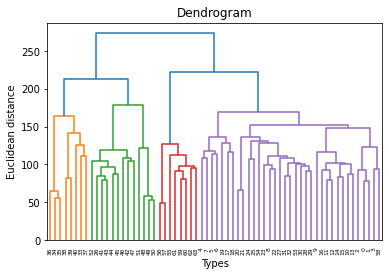

In [142]:
# Hierarchial clustering
import scipy.cluster.hierarchy as sch
dendrogram=sch.dendrogram(sch.linkage(sdata, method ='ward'))
plt.title('Dendrogram')
plt.xlabel('Types')
plt.ylabel('Euclidean distance')
plt.show()

The above dendrogram shows the optimum number of clusters (n) as 5

In [143]:
### From the dendrogram, the optimum number of Clusters is 5
from sklearn.cluster import AgglomerativeClustering
hc=AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage='ward')
y_hc=hc.fit_predict(sdata)
y_hc

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 4,
       4, 4, 4, 4, 3, 3, 3, 3, 4, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2])

In [144]:
unique, counts = np.unique(y_hc, return_counts=True)
dict(zip(unique, counts))

{0: 35, 1: 8, 2: 8, 3: 4, 4: 9}

In [145]:
data['cluster_hc'] = y_hc
data

,1,2,3,4,5,6,7,8,9,10,...,6822,6823,6824,6825,6826,6827,6828,6829,6830,cluster_hc
V1,0.300000,1.180000,0.550000,1.140000,-0.265000,-7.000000e-02,0.350000,-0.315000,-0.450000,-0.654980,...,0.000000,0.030000,-0.175000,0.629981,-0.030000,0.000000,0.280000,-0.340000,-1.930000,0
V2,0.679961,1.289961,0.169961,0.379961,0.464961,5.799610e-01,0.699961,0.724961,-0.040039,-0.285019,...,-0.300039,-0.250039,-0.535039,0.109941,-0.860039,-1.250049,-0.770039,-0.390039,-2.000039,0
V3,0.940000,-0.040000,-0.170000,-0.040000,-0.605000,0.000000e+00,0.090000,0.645000,0.430000,0.475019,...,0.120000,-0.740000,-0.595000,-0.270020,-0.150000,0.000000,-0.120000,-0.410000,0.000000,0
V4,0.280000,-0.310000,0.680000,-0.810000,0.625000,-1.387779e-17,0.170000,0.245000,0.020000,0.095019,...,-0.110000,-0.160000,0.095000,-0.350019,-0.300000,-1.150010,1.090000,-0.260000,-1.100000,0
V5,0.485000,-0.465000,0.395000,0.905000,0.200000,-5.000000e-03,0.085000,0.110000,0.235000,1.490019,...,-0.775000,-0.515000,-0.320000,0.634980,0.605000,0.000000,0.745000,0.425000,0.145000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
V60,-0.030000,-0.480000,0.070000,-0.700000,-0.195000,4.100000e-01,-0.240000,0.105000,-0.410000,0.875019,...,0.150000,-0.430000,0.145000,-0.090020,-0.020000,-1.390010,-1.150000,0.290000,1.190000,2
V61,-0.270000,0.630000,-0.100000,1.100000,1.045000,8.000000e-02,-0.090000,-0.675000,-0.310000,0.275019,...,0.200000,0.290000,-0.035000,0.279981,-0.160000,-0.020010,-0.640000,-0.370000,-0.430000,2
V62,0.210000,-0.620000,-0.150000,-1.330000,0.045000,-4.000000e-01,-0.390000,-0.675000,-0.360000,0.945020,...,-0.120000,0.850000,-0.125000,0.779980,0.390000,0.000000,0.160000,2.030000,3.940000,2
V63,-0.050000,0.140000,-0.090000,-1.260000,0.045000,-2.710505e-20,0.420000,-0.305000,0.310000,0.065019,...,-0.420000,-0.460000,-0.855000,-0.160020,-0.350000,-0.360010,-0.490000,0.010000,-1.720000,2


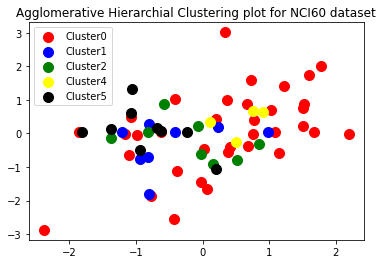

In [146]:
#scatterplot
sdata2 = np.array(sdata)
plt.scatter(sdata2[y_hc == 0,0],sdata2[y_hc == 0,1], s=100, c='red', label = 'Cluster0')
plt.scatter(sdata2[y_hc == 1,0],sdata2[y_hc == 1,1], s=100, c='blue', label = 'Cluster1')
plt.scatter(sdata2[y_hc == 2,0],sdata2[y_hc == 2,1], s=100, c='green', label = 'Cluster2')
plt.scatter(sdata2[y_hc == 3,0],sdata2[y_hc == 3,1], s=100, c='yellow', label = 'Cluster4')
plt.scatter(sdata2[y_hc == 4,0],sdata2[y_hc == 4,1], s=100, c='black', label = 'Cluster5')
plt.title('Agglomerative Hierarchial Clustering plot for NCI60 dataset')
plt.legend()
plt.show()

From the above scatter plot, we can see the distribution of the observations in 5 clusters.

**PCA  (Principal Component Analysis)**

In [147]:
# doing PCA
from sklearn.decomposition import PCA
pca=PCA(n_components=25)
pca.fit(sdata)
X_pca=pca.transform(sdata)
X_pca.shape

(64, 25)

In [148]:
pc_data = pd.DataFrame(X_pca)

In [149]:
pc_data.corr().round()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,1.0,-0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,...,0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,-0.0,0.0,-0.0
1,-0.0,1.0,-0.0,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,...,-0.0,-0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0
2,0.0,-0.0,1.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,...,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0
3,0.0,0.0,0.0,1.0,-0.0,0.0,0.0,-0.0,0.0,-0.0,...,0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0
4,0.0,0.0,-0.0,-0.0,1.0,0.0,0.0,-0.0,-0.0,-0.0,...,-0.0,0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0
5,0.0,0.0,-0.0,0.0,0.0,1.0,-0.0,0.0,-0.0,-0.0,...,-0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,0.0,-0.0,-0.0
6,-0.0,0.0,-0.0,0.0,0.0,-0.0,1.0,-0.0,-0.0,0.0,...,-0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0
7,-0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0,1.0,0.0,-0.0,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0
8,0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,1.0,0.0,...,0.0,-0.0,-0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0
9,0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,-0.0,0.0


**K_Means clustering after PCA**

In [150]:
# K-Means clustering
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
  kmeanspca=KMeans(n_clusters=i,init='k-means++',random_state=42)
  kmeanspca.fit(X_pca)
  wcss.append(kmeanspca.inertia_)
  print(kmeanspca.inertia_)

314045.5927632883
276174.2038580888
249693.20587282375
233044.33652675926
214776.75362346193
206491.90595936443
191988.52292850713
179003.82537885022
169491.04135999433
166452.77030499512


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

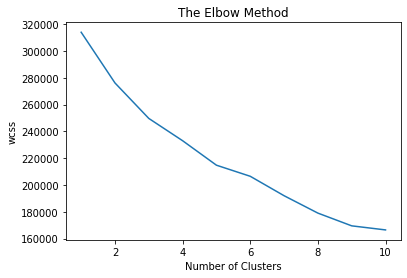

In [151]:
# Elbow method
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('wcss')
plt.show()

In [152]:
# K-Means
kmeanspca=KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeanspca=kmeanspca.fit_predict(X_pca)
type(X_pca)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


numpy.ndarray

In [153]:
y_kmeanspca

array([2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 4, 0, 4, 4, 4, 4, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3],
      dtype=int32)

In [154]:
len(y_kmeanspca)

64

In [155]:
unique, counts = np.unique(y_kmeanspca, return_counts=True)
dict(zip(unique, counts))

{0: 30, 1: 7, 2: 13, 3: 9, 4: 5}

In [156]:
X_pca1 = pd.DataFrame(X_pca)
X_pca1['cluster'] = y_kmeans

In [157]:
X_pca1

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,cluster
0,-19.826142,-3.596978,-9.808434,-0.824858,12.595951,7.478356,14.184132,-3.114327,22.079342,-20.242668,...,19.970291,9.459945,7.353563,4.174103,-7.541412,-7.251142,-10.592769,15.304063,-8.089529,2
1,-23.074396,-6.481410,-13.478915,5.633903,8.028740,3.678337,10.164275,-7.307464,22.330085,-13.013428,...,19.067634,5.988174,8.525800,17.403173,1.267371,-11.442732,-5.170018,13.648421,-5.868885,2
2,-27.478117,-2.483504,-3.535099,-1.330918,12.569275,17.336832,10.404060,-2.751153,-0.391478,-6.219344,...,12.942061,0.113358,-3.849438,5.689964,-1.300438,6.763060,5.343409,0.034311,-4.888455,1
3,-42.845910,9.696685,-0.870587,3.444749,42.275304,27.223861,17.593670,-0.492001,14.246643,15.899689,...,-3.550074,1.122768,2.476494,-1.635580,3.341086,-18.548590,-6.904781,-16.458725,7.827575,1
4,-55.402532,5.068353,-21.069222,15.840211,10.414002,12.924197,12.679945,32.419719,-8.072310,-10.156699,...,-19.627954,-17.540558,-4.037826,7.264059,5.847081,6.190996,-7.497963,-8.540534,-21.231212,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,-18.125165,47.240030,5.450920,-17.414579,-0.307383,-7.453292,-15.567921,22.317760,-2.956298,22.394207,...,-13.263237,12.774506,-3.663332,0.737026,-2.887903,-5.891121,-4.295433,12.234286,-6.560409,0
60,-4.545585,42.349087,8.756786,-2.810588,5.717571,-3.379115,-11.856327,6.650204,1.905589,3.569755,...,-9.340926,4.275395,-5.434582,3.732710,2.407660,-7.689575,-2.171650,11.907029,-1.938316,0
61,-23.078697,36.089972,18.157357,-7.586143,5.885875,0.566182,-7.641988,-5.667051,-5.239885,13.643137,...,3.232140,2.461869,-11.762428,19.241135,10.989924,2.123570,10.956767,-2.261414,7.736081,0
62,-19.304972,50.385806,4.271025,-3.031583,-8.356774,-3.604228,-1.973815,11.890809,-3.834003,-12.690371,...,5.056915,-8.024351,8.721792,0.659879,-13.069196,3.325144,-3.552063,-2.592930,-7.692183,0


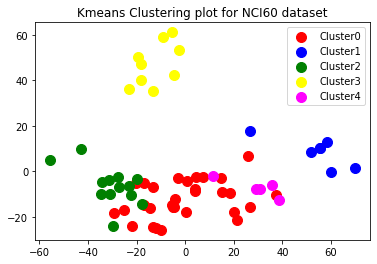

In [158]:
# scatter-plot
sdata3 = np.array(X_pca1)
plt.scatter(sdata3[y_kmeanspca == 0,0],sdata3[y_kmeanspca == 0,1], s=100, c='red', label = 'Cluster0')
plt.scatter(sdata3[y_kmeanspca == 1,0],sdata3[y_kmeanspca == 1,1], s=100, c='blue', label = 'Cluster1')
plt.scatter(sdata3[y_kmeanspca == 2,0],sdata3[y_kmeanspca == 2,1], s=100, c='green', label = 'Cluster2')
plt.scatter(sdata3[y_kmeanspca == 3,0],sdata3[y_kmeanspca == 3,1], s=100, c='yellow', label = 'Cluster3')
plt.scatter(sdata3[y_kmeanspca == 4,0],sdata3[y_kmeanspca == 4,1], s=100, c='magenta', label = 'Cluster4')
plt.title('Kmeans Clustering plot for NCI60 dataset')
plt.legend()
plt.show()

Clusters got differentiated in a more better way when the no of components are reduced using PCA.

**Agglomerative Hierarchial Clustering using PCA**

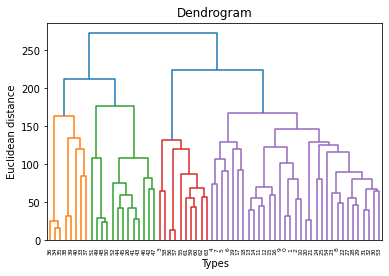

In [159]:
# Hierarchial clustering
import scipy.cluster.hierarchy as sch
dendrogram=sch.dendrogram(sch.linkage(X_pca, method ='ward'))
plt.title('Dendrogram')
plt.xlabel('Types')
plt.ylabel('Euclidean distance')
plt.show()

In [160]:
### From the dendrogram, the optimum number of Clusters is 5
from sklearn.cluster import AgglomerativeClustering
hc=AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage='ward')
y_hcpca=hc.fit_predict(X_pca)
y_hcpca

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3,
       3, 3, 3, 3, 4, 4, 4, 4, 3, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [161]:
unique, counts = np.unique(y_hc, return_counts=True)
dict(zip(unique, counts))

{0: 35, 1: 8, 2: 8, 3: 4, 4: 9}

In [166]:
X_pca2 = pd.DataFrame(X_pca)
X_pca2['cluster_hc'] = y_hcpca
X_pca2

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,cluster_hc
0,-19.826142,-3.596978,-9.808434,-0.824858,12.595951,7.478356,14.184132,-3.114327,22.079342,-20.242668,...,19.970291,9.459945,7.353563,4.174103,-7.541412,-7.251142,-10.592769,15.304063,-8.089529,0
1,-23.074396,-6.481410,-13.478915,5.633903,8.028740,3.678337,10.164275,-7.307464,22.330085,-13.013428,...,19.067634,5.988174,8.525800,17.403173,1.267371,-11.442732,-5.170018,13.648421,-5.868885,0
2,-27.478117,-2.483504,-3.535099,-1.330918,12.569275,17.336832,10.404060,-2.751153,-0.391478,-6.219344,...,12.942061,0.113358,-3.849438,5.689964,-1.300438,6.763060,5.343409,0.034311,-4.888455,0
3,-42.845910,9.696685,-0.870587,3.444749,42.275304,27.223861,17.593670,-0.492001,14.246643,15.899689,...,-3.550074,1.122768,2.476494,-1.635580,3.341086,-18.548590,-6.904781,-16.458725,7.827575,2
4,-55.402532,5.068353,-21.069222,15.840211,10.414002,12.924197,12.679945,32.419719,-8.072310,-10.156699,...,-19.627954,-17.540558,-4.037826,7.264059,5.847081,6.190996,-7.497963,-8.540534,-21.231212,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,-18.125165,47.240030,5.450920,-17.414579,-0.307383,-7.453292,-15.567921,22.317760,-2.956298,22.394207,...,-13.263237,12.774506,-3.663332,0.737026,-2.887903,-5.891121,-4.295433,12.234286,-6.560409,2
60,-4.545585,42.349087,8.756786,-2.810588,5.717571,-3.379115,-11.856327,6.650204,1.905589,3.569755,...,-9.340926,4.275395,-5.434582,3.732710,2.407660,-7.689575,-2.171650,11.907029,-1.938316,2
61,-23.078697,36.089972,18.157357,-7.586143,5.885875,0.566182,-7.641988,-5.667051,-5.239885,13.643137,...,3.232140,2.461869,-11.762428,19.241135,10.989924,2.123570,10.956767,-2.261414,7.736081,2
62,-19.304972,50.385806,4.271025,-3.031583,-8.356774,-3.604228,-1.973815,11.890809,-3.834003,-12.690371,...,5.056915,-8.024351,8.721792,0.659879,-13.069196,3.325144,-3.552063,-2.592930,-7.692183,2


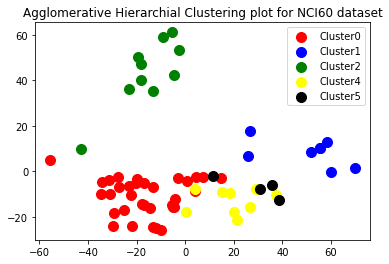

In [167]:
#scatterplot
sdata4 = np.array(X_pca2)
plt.scatter(sdata4[y_hcpca == 0,0],sdata4[y_hcpca == 0,1], s=100, c='red', label = 'Cluster0')
plt.scatter(sdata4[y_hcpca == 1,0],sdata4[y_hcpca == 1,1], s=100, c='blue', label = 'Cluster1')
plt.scatter(sdata4[y_hcpca == 2,0],sdata4[y_hcpca == 2,1], s=100, c='green', label = 'Cluster2')
plt.scatter(sdata4[y_hcpca == 3,0],sdata4[y_hcpca == 3,1], s=100, c='yellow', label = 'Cluster4')
plt.scatter(sdata4[y_hcpca == 4,0],sdata4[y_hcpca == 4,1], s=100, c='black', label = 'Cluster5')
plt.title('Agglomerative Hierarchial Clustering plot for NCI60 dataset')
plt.legend()
plt.show()

Clusters got differentiated in a more better way when the no of components are reduced using PCA.